In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [39]:
# 그래프 선의 종류
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')


In [40]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()

    plt.show()


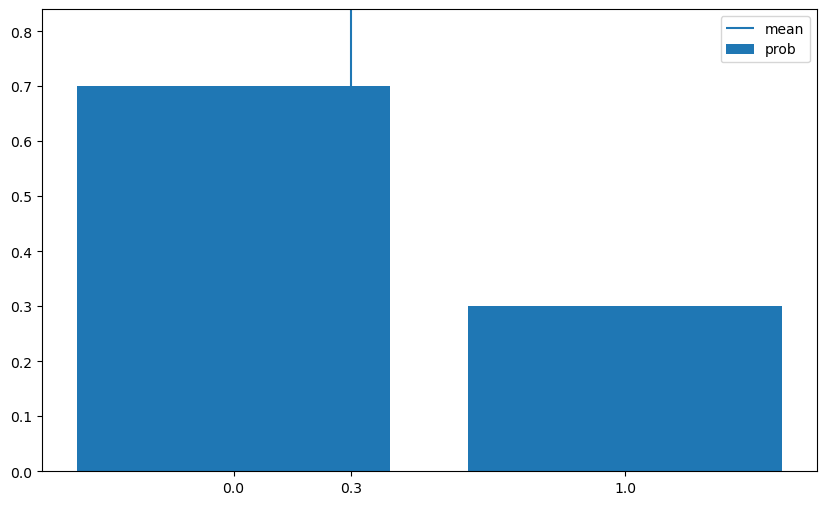

In [43]:
plot_prob(X)

In [26]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f


In [42]:
p = 0.3
X = Bern(p)


In [28]:
check_prob(X)

expected value 0.3
variance 0.21


In [29]:
rv = stats.bernoulli(p)


In [30]:
rv.pmf(0), rv.pmf(1)


(0.700, 0.300)

In [31]:
rv.pmf([0, 1])


array([0.7, 0.3])

In [32]:
rv.cdf([0, 1])

array([0.7, 1. ])

In [33]:
rv.mean(), rv.var()

(0.300, 0.210)

In [34]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f


In [35]:
n = 10
p = 0.3
X = Bin(n, p)


In [36]:
check_prob(X)


expected value 3.0
variance 2.1


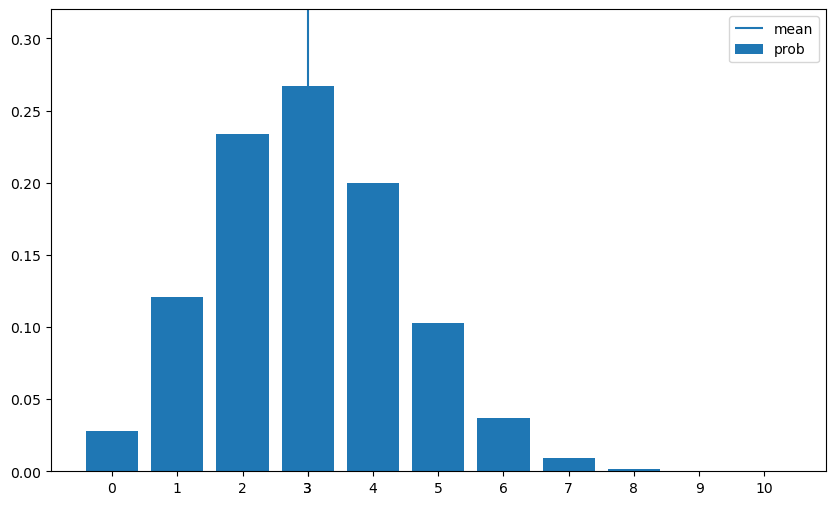

In [37]:
plot_prob(X)


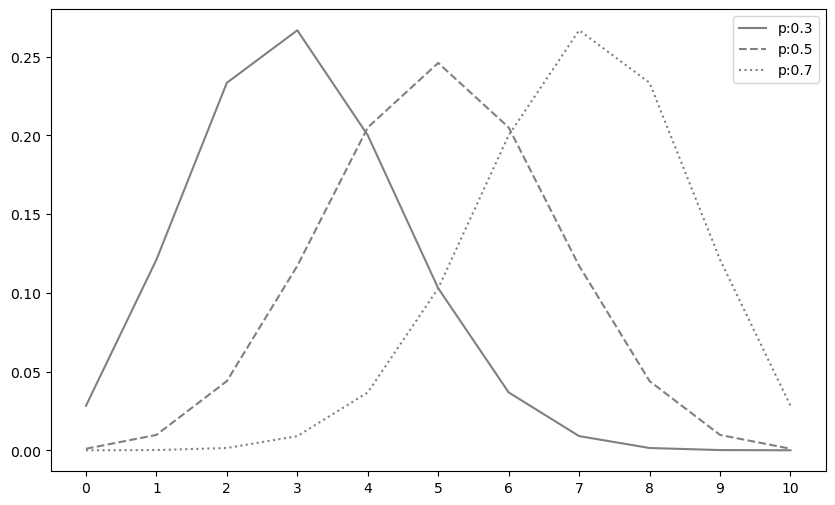

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()


In [45]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f


In [46]:
p = 0.5
X = Ge(p)


In [47]:
check_prob(X)


expected value 2.0
variance 2.0


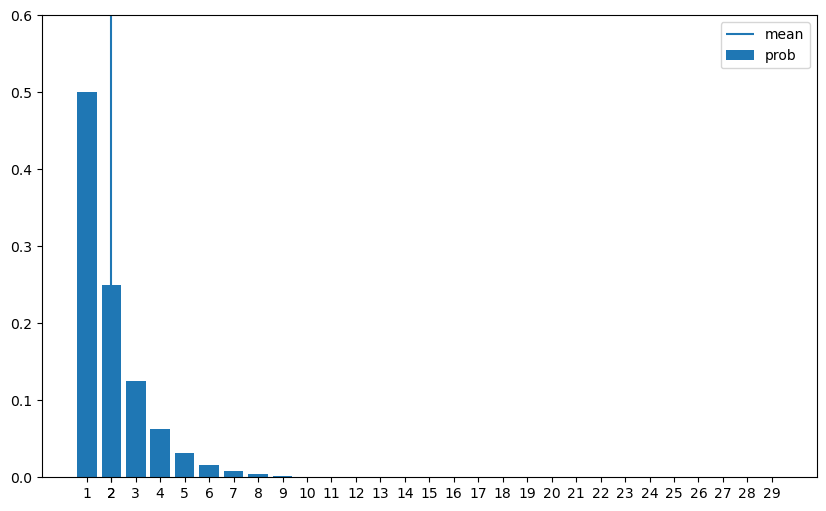

In [48]:
plot_prob(X)


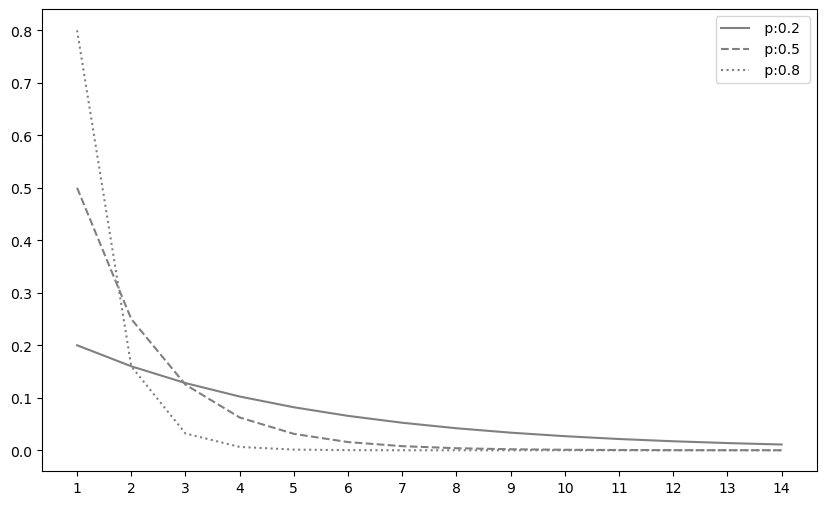

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0ㅌㅌ.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f' p:{p} ', ls=ls, color='gray')

ax.set_xticks(x_set)
ax.legend()

plt.show()


In [53]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f


In [54]:
lam = 3
X = Poi(lam)


In [55]:
check_prob(X)


expected value 3.0
variance 3.0


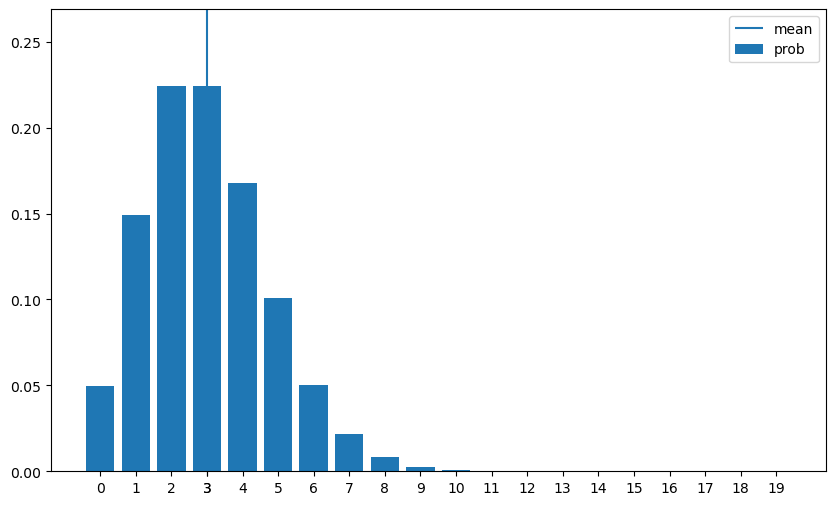

In [56]:
plot_prob(X)


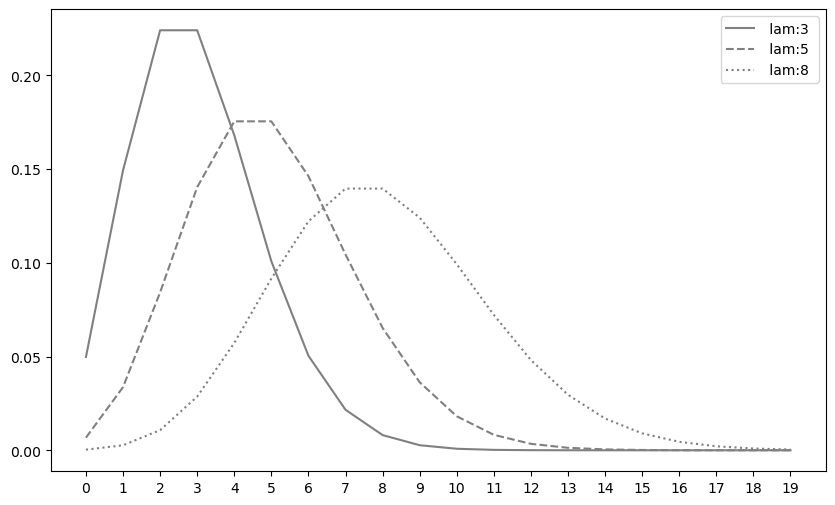

In [57]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f' lam:{lam} ', ls=ls, color='gray')

ax.set_xticks(x_set)
ax.legend()

plt.show()
